In [1]:
# Install the necessary dependencies

import os
import sys
!{sys.executable} -m pip install --quiet pandas scikit-learn numpy matplotlib jupyterlab_myst ipython

---
license:
    code: MIT
    content: CC-BY-4.0
github: https://github.com/ocademy-ai/machine-learning
venue: By Ocademy
open_access: true
bibliography:
  - https://raw.githubusercontent.com/ocademy-ai/machine-learning/main/open-machine-learning-jupyter-book/references.bib
---


# Generative adversarial networks

## Overview

GAN has been applied in real-life applications such as text/image/video generation, drug discovery, and text-to-image synthesis. The following images are examples of image transformation using GANs. 

<div style="text-align:center;">
<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/GAN/image-to-image.png" width="90%" class="bg-white mb-1">
</div>

Generative adversarial networks (GANs) emerge as the virtuosos of artificial creativity, painting canvases with pixels rather than pigments. At their genesis, GANs were forged with a singular mission: to breathe life into the digital realm, conjuring new data from the ethereal depths of probability distributions. Their pioneering design was a symphony of innovation, orchestrating a duel between two neural networks in a ballet of creation and critique.

Picture this: on one side of the stage stands the Generator, a prodigious apprentice armed with brushes of binary. Its purpose, its raison d'être, is to craft masterpieces ex nihilo, stitching together pixels with mathematical finesse. With each iteration, it tiptoes closer to perfection, learning the intricate tapestry of the training set distribution like a virtuoso studying the score.



Opposing it, the Discerner awaits—the arbiter of authenticity, the gatekeeper of verisimilitude. Trained to discern the genuine from the counterfeit, it scrutinizes each creation with a discerning eye, sniffing out flaws and imperfections like a seasoned art critic.

The dance begins. With each pass, the Generator's strokes grow bolder, its compositions more intricate, as it strives to outwit its adversary. Meanwhile, the Discerner stands vigilant, its discriminating gaze sharpened by every encounter. Back and forth they go, locked in an eternal tango of creation and critique.

And then, a breakthrough. In a moment of revelation, the Generator unveils a masterpiece—a synthesis of pixels so sublime, so lifelike, that even the Discerner is momentarily deceived. In that fleeting instant, the boundaries of possibility expand, as the digital canvas is imbued with the spark of innovation.

Such is the essence of GANs—a testament to the power of adversarial collaboration, where artistry and algorithm converge to redefine the boundaries of creativity. From images to text, from music to medicine, their domain knows no bounds, as they continue to shape the future of artificial intelligence, one pixel at a time.

GAN is proposed in 2005, the paper is Ian J. Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, Yoshua Bengio. "Generative Adversarial Networks", arxiv:1406.2661.

## Basic Principle

<div style="text-align:center;">
<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/GAN/gan-concept.png" width="60%" height="60%" class="bg-white mb-1">
</div>

The generator is a key component of a Generative Adversarial Network (GAN), playing the role of generating data samples. It is typically composed of a neural network that takes a random latent vector as input and outputs a data sample similar to real data samples.

The discriminator, on the other hand, is another important component of a GAN, responsible for determining whether the input data is real or generated (fake) data. The discriminator is usually a binary classifier that takes a data sample as input and outputs a scalar representing the probability that the input data is real.

## Mathematically Modeling

GAN consists of two neural networks: a generator G(z, θ₁) and a discriminator D(x, θ₂). The generator maps random noise variable z to the data space x, attempting to generate realistic synthetic data. The discriminator classifies the data, outputting the probability that the data comes from the real dataset, ranging from 0 to 1.

During training, the discriminator's goal is to correctly classify real and generated data. Its weights are updated to maximize the probability of real data being classified as real, while minimizing the probability of generated data being classified as real. The generator's goal is to generate sufficiently realistic data to fool the discriminator. Its weights are optimized to maximize the probability of generated data being classified as real.

In practice, the logarithm of the probability (e.g. log D(…)) is used in the loss functions instead of the raw probabilies, since using a log loss heavily penalises classifiers that are confident about an incorrect classification.

<div style="text-align:center;">
<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/GAN/loss.png" width="60%" height="60%" class="bg-white mb-1">
</div>

The training process of a GAN can be thought of two agents playing a minimax game with value function V(G,D)., where the generator tries to maximize the probability that its output is classified as real, while the discriminator tries to minimize this value. When the generator and discriminator reach a balance, the data generated by the generator looks indistinguishable from real data, indicating successful GAN training.

<div style="text-align:center;">
<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/GAN/minimax.png" width="60%" height="60%" class="bg-white mb-1">
</div>


## Training a GAN

Since both the generator and discriminator are being modeled with neural, networks, agradient-based optimization algorithm can be used to train the GAN. In our coding example we’ll be using stochastic gradient descent, as it has proven to be succesfull in multiple fields.

<div style="text-align:center;">
<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/GAN/algorithm.png" width="60%" height="60%" class="bg-white mb-1">
</div>

The fundamental steps to train a GAN can be described as following:

1. Sample a noise set and a real-data set, each with size m.
2. Train the Discriminator on this data.
3. Sample a different noise subset with size m.
4. Train the Generator on this data.
5. Repeat from Step 1.

## Explore Generative Adversarial Nets

<div style="text-align:center;">
<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/GAN/gan-playground.png" width="60%" height="60%" class="bg-white mb-1">
</div>

<a href="https://static-1300131294.cos.ap-shanghai.myqcloud.com/html/gan-playground/gan-playground-gh-pages/index.html" target="_blank">GAN Playground</a>

This playground lets you play around with Generative Adversarial Networks right in your browser. Currently, it contains three built-in datasets: MNIST, Fashion MNIST, and CIFAR-10.

It provides you the ability to set your models' hyperparameters and build up your discriminator and generator layer-by-layer. You can observe the network learn in real time as the generator produces more and more realistic images, or more likely, gets stuck in failure modes such as mode collapse.

## Code

<div style="text-align:center;">
<img src="https://static-1300131294.cos.ap-shanghai.myqcloud.com/images/deep-learning/GAN/dcgan_mnist.gif" width="30%" height="30%">
<p style="text-align:center;">Create Hand-written digits
</div>


In [3]:
import tensorflow as tf
import requests
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Here, the default parameters of matplotlib are set, including the size of the plots, the interpolation method for images, and the colormap for images.

### Function of displaying a grid of images

In [4]:
def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])  # images reshape to (batch_size, D)
    sqrtn = int(np.ceil(np.sqrt(images.shape[0])))
    sqrtimg = int(np.ceil(np.sqrt(images.shape[1])))

    fig = plt.figure(figsize=(sqrtn, sqrtn))
    gs = gridspec.GridSpec(sqrtn, sqrtn)
    gs.update(wspace=0.05, hspace=0.05)

    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(img.reshape([sqrtimg,sqrtimg]))
    return

The show_images function is used to display a set of images. It displays the input set of images in a single figure window, with the number of rows and columns determined by the number of input images. Each image is placed in a subplot of a grid layout.

### Functions of pre-processing and post-processing images

In [5]:
def preprocess_img(x):
    return 2 * x - 1.0

def deprocess_img(x):
    return (x + 1.0) / 2.0

def rel_error(x,y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

def count_params(model):
    """Count the number of parameters in the current TensorFlow graph """
    param_count = np.sum([np.prod(p.shape) for p in model.weights])
    return param_count


### Download a file from a URL using the requests library

In [6]:
url = 'https://static-1300131294.cos.ap-shanghai.myqcloud.com/data/deep-learning/Gan/gan-checks-tf.npz'
response = requests.get(url)
with open('gan-checks-tf.npz', 'wb') as f:
    f.write(response.content)

# Now you can use np.load on the downloaded file
answers = np.load('gan-checks-tf.npz')

NOISE_DIM = 96

### Load Data

Here, the MNIST dataset is loaded and preprocessed, and an iterator interface is provided for iterating over the dataset in batches. The image data is normalized, which is beneficial for subsequent training. 

You can visit this link to learn more about the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and [preprocessing](https://github.com/soumith/ganhacks).

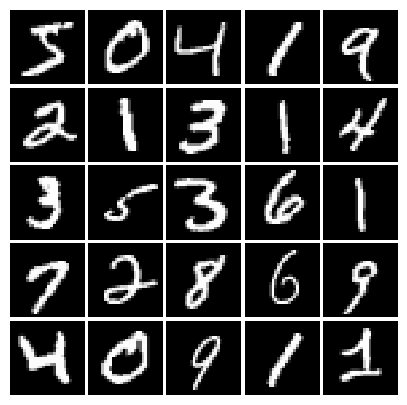

In [7]:
class MNIST(object):
    def __init__(self, batch_size, shuffle=False):
        """
        Construct an iterator object over the MNIST data
        
        Inputs:
        - batch_size: Integer giving number of elements per minibatch
        - shuffle: (optional) Boolean, whether to shuffle the data on each epoch
        """
        train, _ = tf.keras.datasets.mnist.load_data()
        X, y = train
        X = X.astype(np.float32)/255
        X = X.reshape((X.shape[0], -1))
        self.X, self.y = X, y
        self.batch_size, self.shuffle = batch_size, shuffle

    def __iter__(self):
        N, B = self.X.shape[0], self.batch_size
        idxs = np.arange(N)
        if self.shuffle:
            np.random.shuffle(idxs)
        return iter((self.X[i:i+B], self.y[i:i+B]) for i in range(0, N, B)) 
mnist = MNIST(batch_size=25) 
show_images(mnist.X[:25])

### Compute the leaky ReLU activation function

In [8]:
def leaky_relu(x, alpha=0.01):
    x = tf.nn.leaky_relu(x,alpha)
    return x
    pass

Leaky ReLU allows a portion of negative values to pass through, maintaining the non-linear properties of the activation function, while also avoiding some of the issues that ReLU can lead to.

### Generate random uniform noise from -1 to 1

In [9]:
def sample_noise(batch_size, dim):
    noise = tf.random.uniform([batch_size,dim],minval = -1,maxval = 1)
    return noise
    pass

### Compute discriminator score for a batch of input images

In [10]:
def discriminator():
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(784),
        tf.keras.layers.Dense(256),
        tf.keras.layers.LeakyReLU(0.01),
        tf.keras.layers.Dense(256),
        tf.keras.layers.LeakyReLU(0.01),
        tf.keras.layers.Dense(1)
    ])
    return model

In [12]:
warnings.filterwarnings("ignore")
def test_discriminator(true_count=267009):
    model = discriminator()
    cur_count = count_params(model)
    if cur_count != true_count:
        print('Incorrect number of parameters in discriminator. {0} instead of {1}. Check your achitecture.'.format(cur_count,true_count))
    else:
        print('Correct number of parameters in discriminator.')
        
test_discriminator()

Correct number of parameters in discriminator.


### Compute generator score for a batch of input images

In [13]:
def generator(noise_dim=NOISE_DIM):
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(noise_dim),
        tf.keras.layers.Dense(1024),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dense(1024),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Dense(784,activation = tf.nn.tanh)
    ])
    return model

In [14]:
def test_generator(true_count=1858320):
    model = generator(4)
    cur_count = count_params(model)
    if cur_count != true_count:
        print('Incorrect number of parameters in generator. {0} instead of {1}. Check your achitecture.'.format(cur_count,true_count))
    else:
        print('Correct number of parameters in generator.')
        
test_generator()

Correct number of parameters in generator.


### Compute the discriminator loss

In [15]:
def discriminator_loss(logits_real, logits_fake):

    loss = None
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    real_loss = cross_entropy(tf.ones_like(logits_real), logits_real)
    fake_loss = cross_entropy(tf.zeros_like(logits_fake), logits_fake)
    loss = real_loss + fake_loss
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return loss

def test_discriminator_loss(logits_real, logits_fake, d_loss_true):
    d_loss = discriminator_loss(tf.constant(logits_real),
                                tf.constant(logits_fake))
    print("Maximum error in d_loss: %g"%rel_error(d_loss_true, d_loss))

test_discriminator_loss(answers['logits_real'], answers['logits_fake'],
                        answers['d_loss_true'])

Maximum error in d_loss: 6.02597e-17


The discriminator's goal is to classify real samples as real (output close to 1) and generated samples as fake (output close to 0). Therefore, the discriminator's loss function usually consists of two parts: the loss for real samples and the loss for generated samples, summed together.

### Compute the generator loss

In [16]:
def generator_loss(logits_fake):
    loss = None
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    loss = cross_entropy(tf.ones_like(logits_fake), logits_fake)
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return loss

def test_generator_loss(logits_fake, g_loss_true):
    g_loss = generator_loss(tf.constant(logits_fake))
    print("Maximum error in g_loss: %g"%rel_error(g_loss_true, g_loss))

test_generator_loss(answers['logits_fake'], answers['g_loss_true'])

Maximum error in g_loss: 7.19722e-17


The generator's loss function is typically the extent to which the generated samples are classified as real, the cross-entropy loss between the generator's outputs and the target values (all 1).

### Create solvers for GAN training

In [17]:
def get_solvers(learning_rate=1e-3, beta1=0.5):
    D_solver = None
    G_solver = None
    D_solver = tf.optimizers.Adam(learning_rate,beta1)
    G_solver = tf.optimizers.Adam(learning_rate,beta1)
    pass
    return D_solver, G_solver

### Train a GAN for a certain number of epochs

In [23]:
def run_a_gan(D, G, D_solver, G_solver, discriminator_loss, generator_loss,\
              show_every=1000, print_every=20, batch_size=16, num_epochs=3, noise_size=96):
    mnist = MNIST(batch_size=batch_size, shuffle=True)
    
    iter_count = 0
    for epoch in range(num_epochs):
        for (x, _) in mnist:
            with tf.GradientTape() as tape:
                real_data = x
                logits_real = D(preprocess_img(real_data))

                g_fake_seed = sample_noise(batch_size, noise_size)
                fake_images = G(g_fake_seed)
                logits_fake = D(tf.reshape(fake_images, [batch_size, 784]))
                d_total_error = discriminator_loss(logits_real, logits_fake)
                d_gradients = tape.gradient(d_total_error, D.trainable_variables)      
                D_solver.apply_gradients(zip(d_gradients, D.trainable_variables))
            
            with tf.GradientTape() as tape:
                g_fake_seed = sample_noise(batch_size, noise_size)
                fake_images = G(g_fake_seed)

                gen_logits_fake = D(tf.reshape(fake_images, [batch_size, 784]))
                g_error = generator_loss(gen_logits_fake)
                g_gradients = tape.gradient(g_error, G.trainable_variables)      
                G_solver.apply_gradients(zip(g_gradients, G.trainable_variables))

            if (iter_count % show_every == 0):
                print('Epoch: {}, Iter: {}, D: {:.4}, G:{:.4}'.format(epoch, iter_count,d_total_error,g_error))
                imgs_numpy = fake_images.cpu().numpy()
                show_images(imgs_numpy[0:30])
                plt.show()
            iter_count += 1
    
    # random noise fed into our generator
    z = sample_noise(batch_size, noise_size)
    # generated images
    G_sample = G(z)
    print('Final images')
    show_images(G_sample[:16])
    plt.show()


Epoch: 0, Iter: 0, D: 1.14, G:0.6946


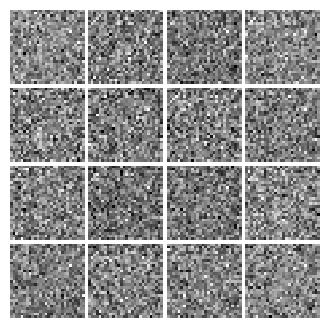

Epoch: 0, Iter: 1000, D: 0.7591, G:2.441


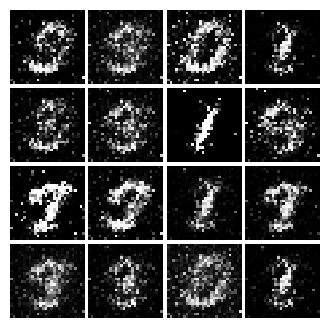

Epoch: 0, Iter: 2000, D: 0.9709, G:0.9196


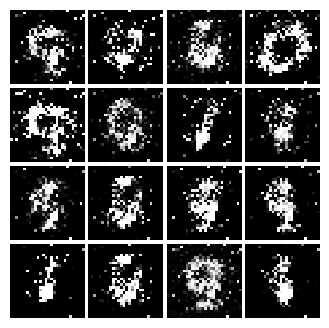

Epoch: 0, Iter: 3000, D: 1.2, G:2.018


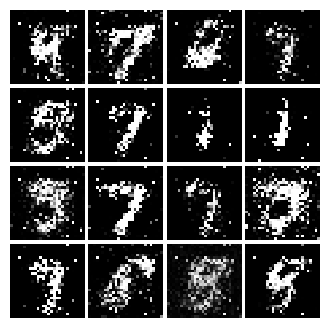

Epoch: 1, Iter: 4000, D: 1.199, G:1.177


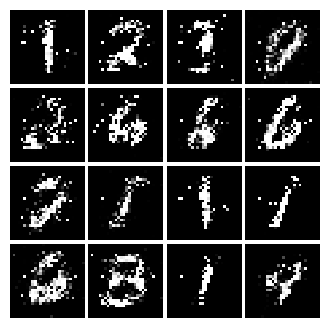

Epoch: 1, Iter: 5000, D: 1.263, G:1.492


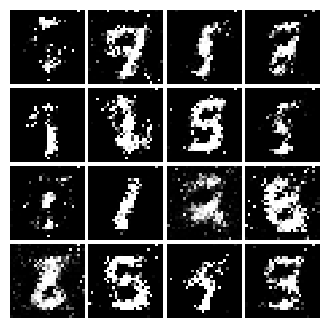

Epoch: 1, Iter: 6000, D: 1.287, G:0.8328


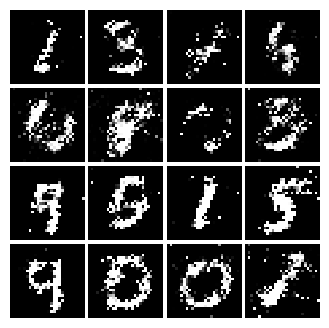

Epoch: 1, Iter: 7000, D: 1.295, G:1.124


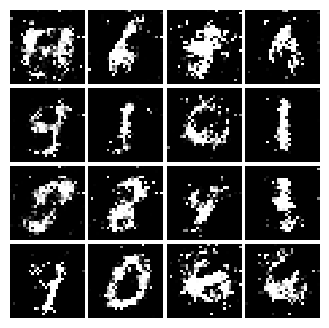

Epoch: 2, Iter: 8000, D: 1.302, G:1.125


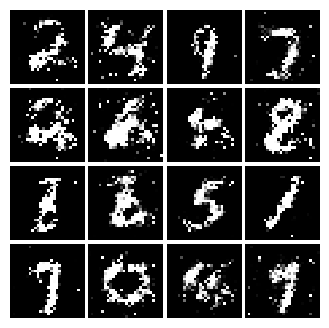

Epoch: 2, Iter: 9000, D: 1.118, G:0.6758


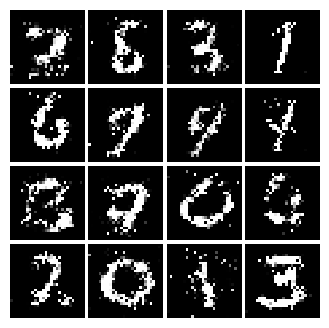

Epoch: 2, Iter: 10000, D: 1.173, G:0.7965


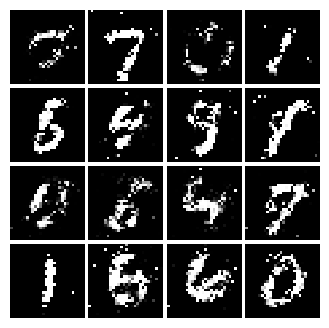

Epoch: 2, Iter: 11000, D: 1.351, G:0.9481


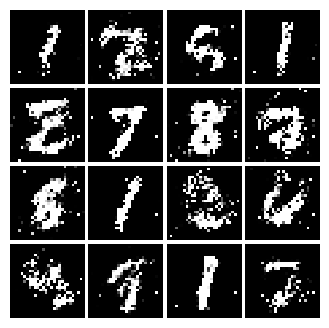

Final images


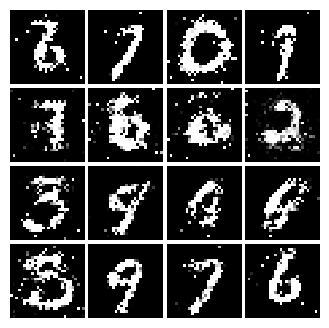

In [24]:
warnings.filterwarnings("ignore")
# Make the discriminator
D = discriminator()

# Make the generator
G = generator()

# Use the function you wrote earlier to get optimizers for the Discriminator and the Generator
D_solver, G_solver = get_solvers()

# Run it!
run_a_gan(D, G, D_solver, G_solver, discriminator_loss, generator_loss)

## Your turn! 🚀

Implement TODO part of the code in this notebook.

Assignment - [Art by gan](../assignments/art-by-gan.ipynb)

## Acknowledgments

Thanks to [Sebastian Raschka](https://github.com/rasbt) for creating the open-source project [stat453-deep-learning-ss20](https://github.com/rasbt/stat453-deep-learning-ss20) and [Diego Gomez](https://github.com/diegoalejogm) for creating the open-source project [gans](https://github.com/diegoalejogm/gans). They inspire the majority of the content in this chapter.
